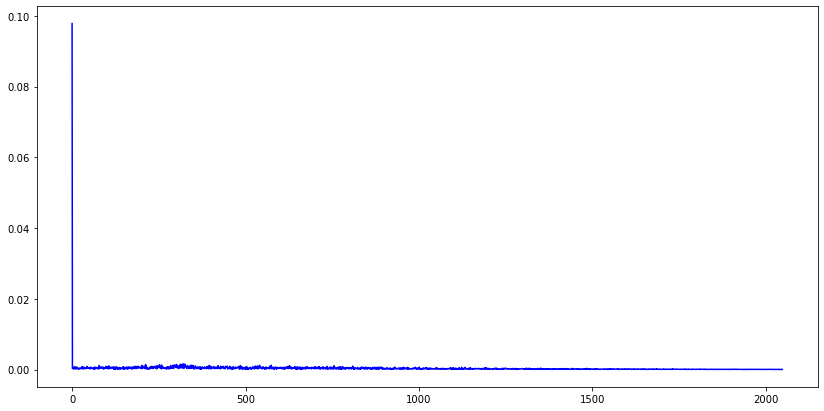

In [51]:
import json

def extract_amplitude_values(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        spectrum_chart = data.get('spectrum_chart', [])[1:]  # Start slicing from the second element
        amplitude_values = [amplitude for _, amplitude in spectrum_chart]
        return amplitude_values

file_path = '/Users/svirinstepan/Documents/spectra_json/2023_06_15T15:04:37_2_B.json'
amplitude_values = extract_amplitude_values(file_path)
plt.figure(figsize=(14, 7))
plt.plot(amplitude_values, label='Original Data', linestyle='-', color='blue')


# Extract Data from Spectra_Json

In [61]:
import json
import pandas as pd
import numpy as np
import glob

def extract_and_save_amplitude_values(directory_path, output_directory):
    json_files = glob.glob(directory_path + '/*.json')
    count_below_threshold = 0

    for file_path in json_files:
        with open(file_path, 'r') as file:
            data = json.load(file)
            spectrum_chart = data.get('spectrum_chart', [])[1:251]  # Skip the first element and take the first 250 elements
            amplitude_values = [amplitude for _, amplitude in spectrum_chart]

            if np.mean(amplitude_values) > 0.001:
                
                df = pd.DataFrame({'Amplitude': amplitude_values})
                output_file_name = file_path.split('/')[-1].replace('.json', '.csv')
                output_file_path = output_directory + '/' + output_file_name
                df.to_csv(output_file_path, index=False)
            else:
                count_below_threshold += 1 

    print(f'Number of files with mean amplitude below 0.001: {count_below_threshold}')

# Usage
directory_path = '/Users/svirinstepan/Documents/spectra_json'
output_directory = '/Users/svirinstepan/Desktop/LAMBDA/good_data_for_conv'
extract_and_save_amplitude_values(directory_path, output_directory)


Number of files with mean amplitude below 0.001: 1793


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


csv_file_path = '/Users/svirinstepan/Desktop/LAMBDA/good_data_for_conv/2023_06_15T17:50:53_2_B.csv'
df = pd.read_csv(csv_file_path)

plt.plot(df['Amplitude'])
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.title('Amplitude Values')
plt.show()


# Generate Bad Data by Inserting Peak

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import convolve

def add_and_plot_smoothed_peak(csv_file_path, peak_height_hybrid, peak_center_hybrid, peak_base_width, kernel_size):
    data = pd.read_csv(csv_file_path)
    indices = np.arange(len(data))

    triangle_peak = np.zeros(len(data))
    half_base_width = peak_base_width // 2
    start_index = peak_center_hybrid - half_base_width
    triangle_peak[start_index:start_index + half_base_width] = np.linspace(0, peak_height_hybrid, half_base_width)
    end_index = start_index + peak_base_width
    triangle_peak[start_index + half_base_width:end_index] = np.linspace(peak_height_hybrid, 0, peak_base_width - half_base_width)

    gaussian_kernel = np.exp(-np.linspace(-2, 2, kernel_size)**2)
    gaussian_kernel /= gaussian_kernel.sum()  # Normalize the kernel

    smoothed_peak = convolve(triangle_peak, gaussian_kernel, mode='same')
    
    data_with_smoothed_peak = data.iloc[:, 0] + smoothed_peak

    plt.figure(figsize=(14, 7))
    plt.plot(data, label='Original Data', linestyle='-', color='blue')
    plt.plot(data_with_smoothed_peak, label='Data with Smoothed Peak', linestyle='-', color='green')
    plt.title('Original Data vs. Data with Smoothed Peak')
    plt.xlabel('Frequency Unit')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

csv_file_path = '/Users/svirinstepan/Desktop/LAMBDA/good_data_for_conv/2023_06_05T06:34:37_2_A.csv'
add_and_plot_smoothed_peak(csv_file_path, 1.9, 150, 8, 10)


In [48]:
import os
import numpy as np
import pandas as pd
from scipy.signal import convolve
import glob

def add_smoothed_peak_to_files(input_directory, output_directory, peak_height_hybrid, peak_center_hybrid, peak_base_width, kernel_size):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
        
    for csv_file in glob.glob(input_directory + '/*.csv'):
        data = pd.read_csv(csv_file)

        indices = np.arange(len(data))
        triangle_peak = np.zeros(len(data))
        half_base_width = peak_base_width // 2
        start_index = peak_center_hybrid - half_base_width
        end_index = start_index + peak_base_width
        triangle_peak[start_index:start_index + half_base_width] = np.linspace(0, peak_height_hybrid, half_base_width)
        triangle_peak[start_index + half_base_width:end_index] = np.linspace(peak_height_hybrid, 0, peak_base_width - half_base_width)

        gaussian_kernel = np.exp(-np.linspace(-2, 2, kernel_size)**2)
        gaussian_kernel /= gaussian_kernel.sum() 

        smoothed_peak = convolve(triangle_peak, gaussian_kernel, mode='same')

        data_with_smoothed_peak = data.iloc[:, 0] + smoothed_peak

        filename, file_extension = os.path.splitext(os.path.basename(csv_file))
        output_file_name = filename + '_bad_150' + file_extension
        output_file_path = os.path.join(output_directory, output_file_name)
        data_with_smoothed_peak.to_csv(output_file_path, index=False)


input_directory = '/Users/svirinstepan/Desktop/LAMBDA/good_data_for_conv'
output_directory = '/Users/svirinstepan/Desktop/LAMBDA/bad_data_for_conv_150_1.9_8_10'
add_smoothed_peak_to_files(input_directory, output_directory, 1.9, 150, 8, 10)


In [ ]:
data = pd.read_csv('/Users/svirinstepan/Desktop/LAMBDA/bad_data_for_conv/2023_06_05T06:34:37_2_A_bad.csv')
print(np.mean(data))

plt.figure(figsize=(14, 7))
plt.plot(data, label='Data with Smoothed Peak', linestyle='-', color='green')
plt.title(f'Data from ')
plt.xlabel('Frequency Unit')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
data = pd.read_csv('/Users/svirinstepan/Desktop/LAMBDA/good_data_for_conv/2023_06_05T06:34:37_2_A.csv')
# Plot the data
print(np.mean(data))
plt.figure(figsize=(14, 7))
plt.plot(data, label='Data with Smoothed Peak', linestyle='-', color='green')
plt.title(f'Data from ')
plt.xlabel('Frequency Unit')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'pd' is not defined